In [51]:
# Import the tables of the data set as dataframes.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_games = pd.read_csv('./games_of_all_time.csv')
df_steam = pd.read_csv('./steam.csv')

In [52]:
a=np.array(df_games['game_name'])
b=np.array(df_steam['name'])
text = ''.join(np.concatenate((a, b), axis=0))

In [53]:
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

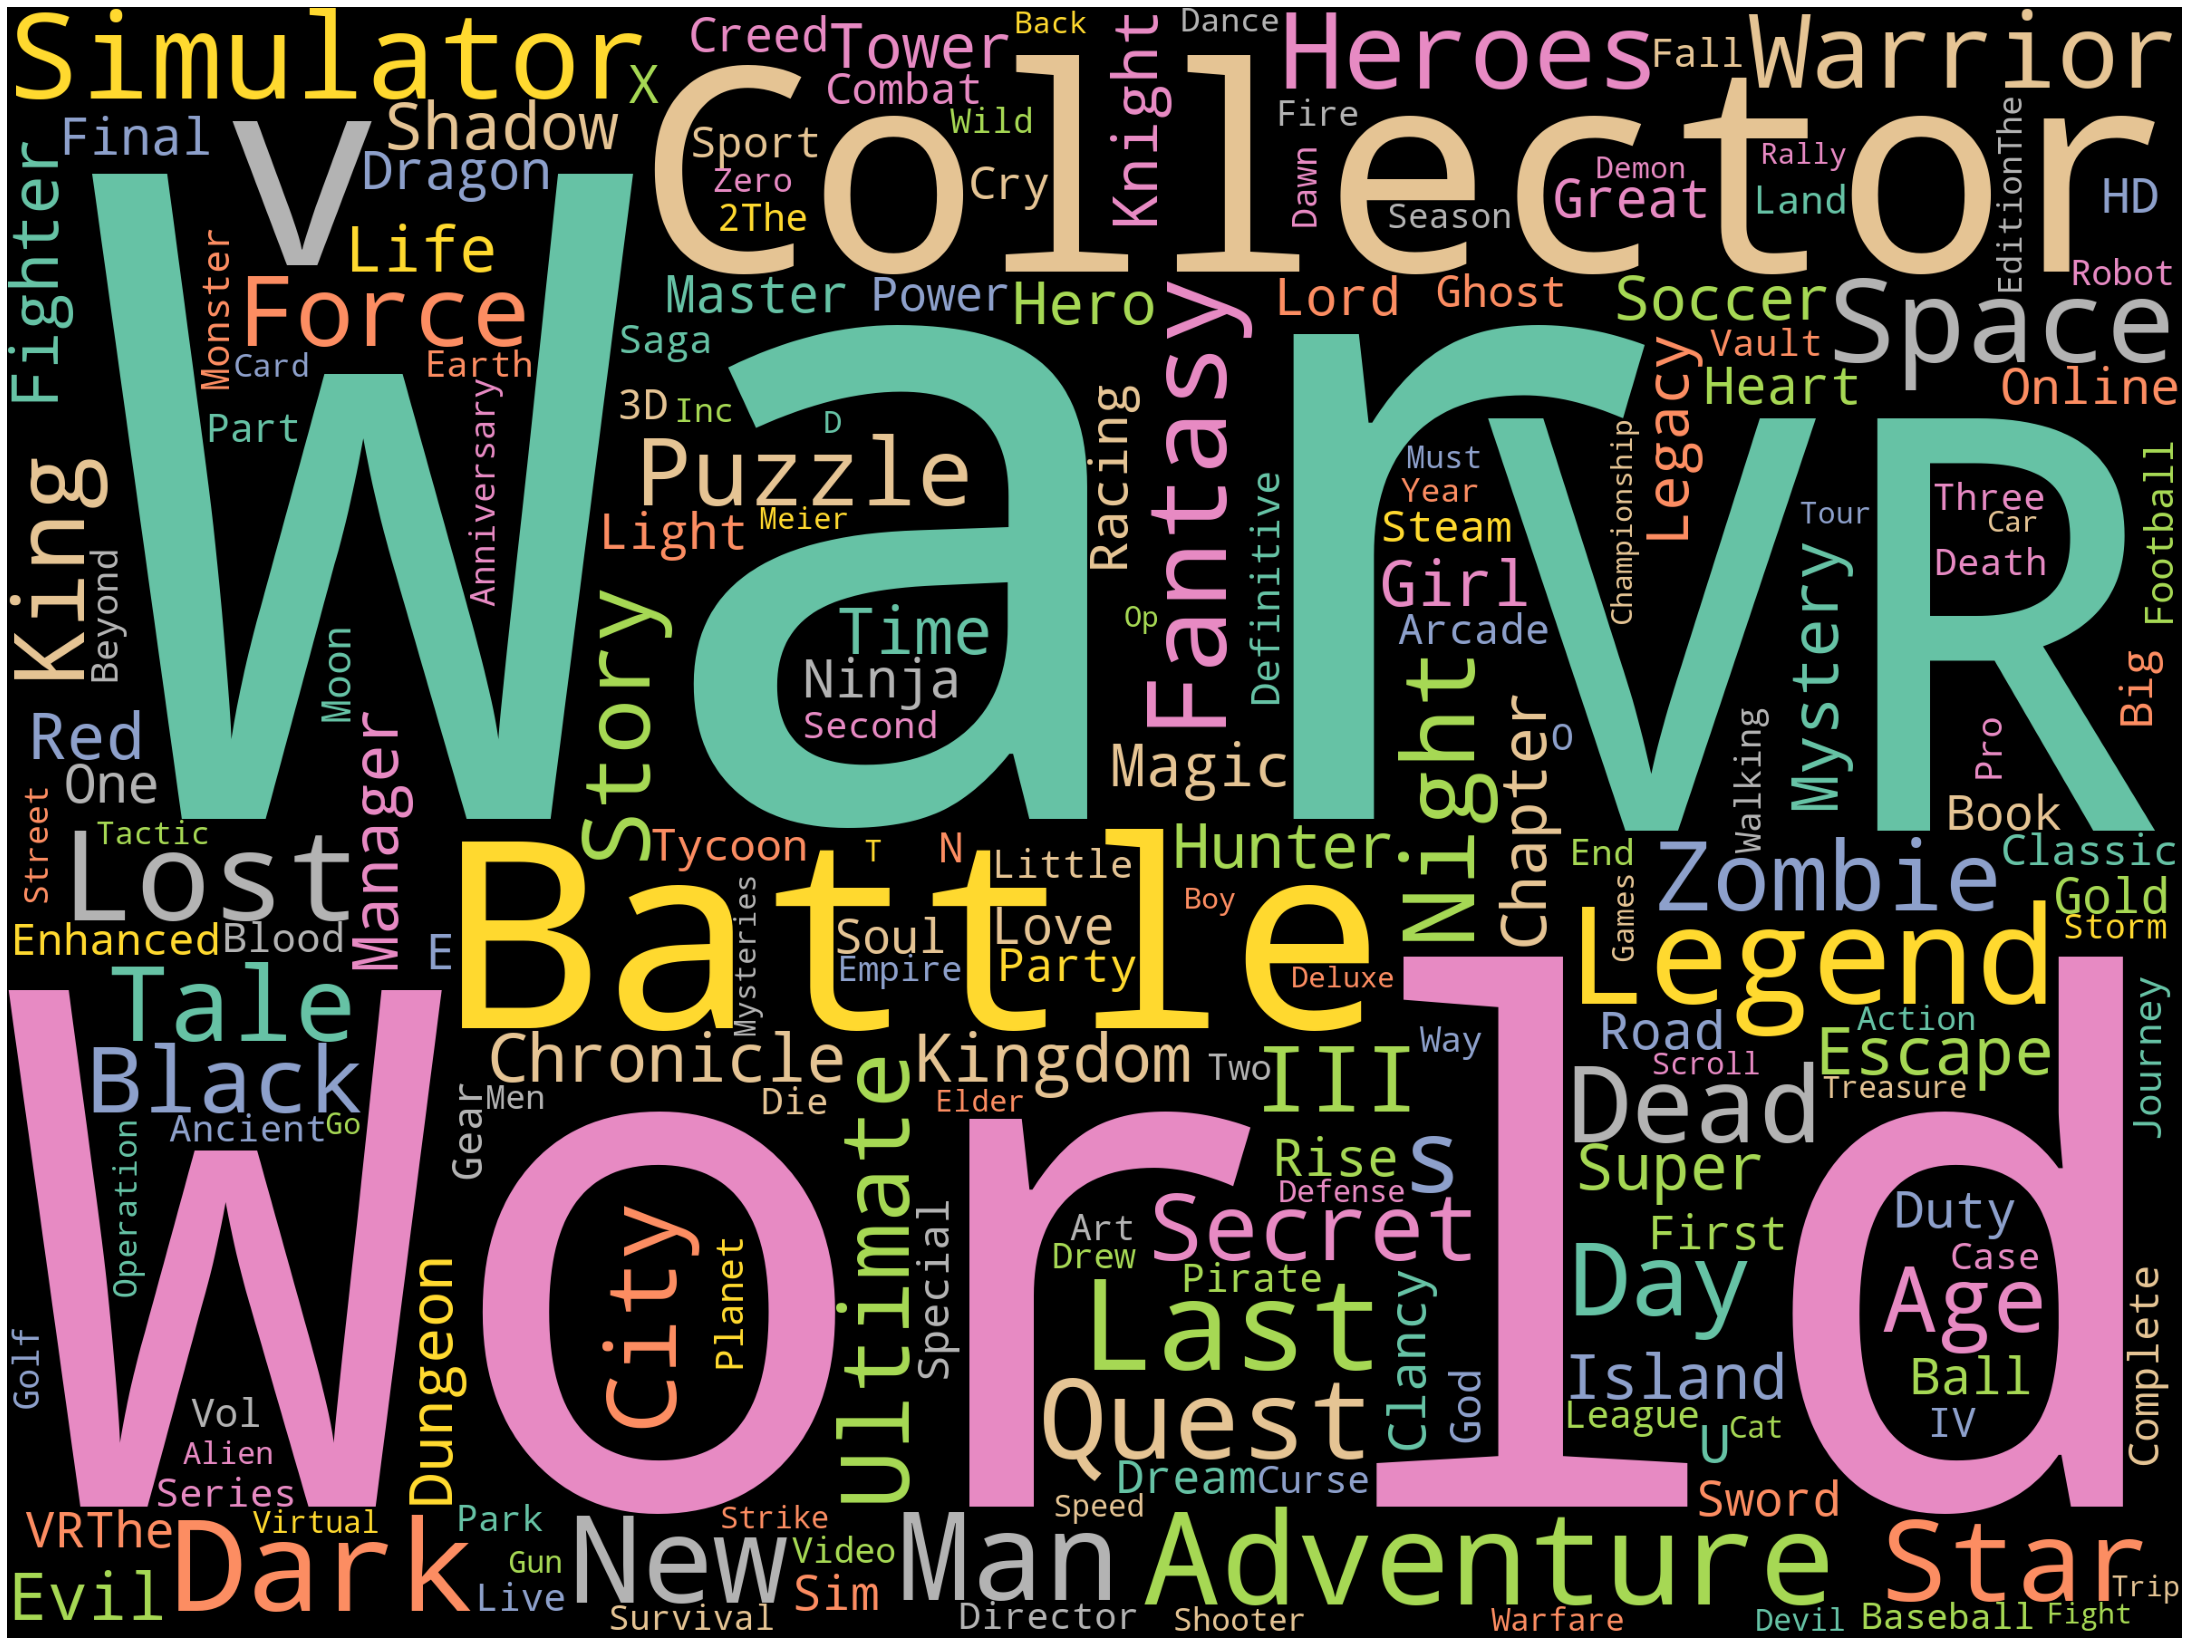

In [54]:
mask = np.array(Image.open('cont2.png'))
# Generate wordcloud
wordcloud = WordCloud(mask=mask,width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS.union(set(['game', '>', 'I', 'II', 'Episode','Edition']))).generate(text)
# Plot
plot_cloud(wordcloud)


In [2]:
#preview
df_games.head()

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+


In [3]:
print("Number elements in dataset: ", len(df_games))

Number elements in dataset:  8831


In [4]:
print("Number of N/A entries: ", len(df_games) - len(df_games.dropna()))

Number of N/A entries:  2898


In [5]:
#number of games per developer
print("ranking of developers per number of games released")
df_games.groupby('developer').count().sort_values(by=['game_name'], ascending=False)['game_name']

ranking of developers per number of games released


developer
Capcom                   150
Nintendo                 130
Telltale Games           104
Konami                    86
Square Enix               76
                        ... 
Investigate North Aps      1
Investigate North          1
Invader Studios            1
Interwave Studios          1
zSlide                     1
Name: game_name, Length: 2927, dtype: int64

In [6]:
#best meta score
print("ranking of developers per average meta score")
df_games.groupby('developer').mean().sort_values(by=['meta_score'], ascending=False)['meta_score']

ranking of developers per average meta score


developer
HuneX                      97.00
Monstars Inc.              95.00
MPS Labs                   94.00
NexTech                    94.00
tobyfox                    92.33
                           ...  
Versus Evil                21.00
Hammerpoint Interactive    20.00
Pure FPS                   19.00
Gravity Corporation        17.00
Art Co., Ltd.              11.00
Name: meta_score, Length: 2927, dtype: float64

In [7]:
#best user score
print("ranking of developers per average user score")
df_games.groupby('developer').mean().sort_values(by=['user_score'], ascending=False)['user_score']

ranking of developers per average user score


developer
Vanilla Ware               91.5
historia Inc               91.5
Wube Software LTD.         91.0
SimTex                     90.0
Team Cherry                90.0
                           ... 
exozet                     20.0
Big Ape Productions        19.0
Hammerpoint Interactive    17.0
Gravity Corporation        15.0
Pure FPS                   13.0
Name: user_score, Length: 2927, dtype: float64

In [8]:
print("Number of games per platform: ")
df_games['platform'].value_counts()

Number of games per platform: 


['pc']                                                              1995
['playstation-4']                                                    607
['switch']                                                           509
['playstation-2']                                                    488
['xbox-360']                                                         462
                                                                    ... 
['xbox-360', 'wii', '3ds', 'playstation-vita']                         1
['pc', 'xbox-360', 'playstation-3', 'wii', 'ds']                       1
['switch', 'xbox-series-x', 'pc', 'playstation-4']                     1
['xbox', 'gamecube', 'pc']                                             1
['xbox-360', 'xbox-one', 'ds', 'playstation-3', 'playstation-4']       1
Name: platform, Length: 506, dtype: int64

In [9]:
print("Number of games per type (singleplayer/multiplayer): ")
df_games['type'].value_counts()

Number of games per type (singleplayer/multiplayer): 


singleplayer    3527
multiplayer     3200
Name: type, dtype: int64

In [10]:
print("Number of multiplayer pc exclusives:", len(df_games.loc[(df_games['platform'] =="['pc']") & (df_games['type'] == 'multiplayer')]))
print("Number of singleplayer pc exclusives:", len(df_games.loc[(df_games['platform'] =="['pc']") & (df_games['type'] == 'singleplayer')]))
print("Number of multiplayer playstation 4 exclusives:", len(df_games.loc[(df_games['platform'] =="['playstation-4']") & (df_games['type'] == 'multiplayer')]))

Number of multiplayer pc exclusives: 618
Number of singleplayer pc exclusives: 857
Number of multiplayer playstation 4 exclusives: 185


In [11]:
#preview
df_steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [12]:
print("Number elements in dataset: ", len(df_steam))
print("Number of N/A entries: ", len(df_steam) - len(df_steam.dropna()))

Number elements in dataset:  27075
Number of N/A entries:  0


In [13]:
#number of games per developer
print("ranking of developers per number of games released")
df_steam.groupby('developer').count().sort_values(by=['name'], ascending=False)['name']

ranking of developers per number of games released


developer
Choice of Games                             94
KOEI TECMO GAMES CO., LTD.                  72
Ripknot Systems                             62
Laush Dmitriy Sergeevich                    51
Nikita "Ghost_RUS"                          50
                                            ..
Hollowhead, Inc.                             1
Holmsario Games                              1
Hologram Software LTD.;iCandy Games Inc.     1
Holomia                                      1
수프림                                          1
Name: name, Length: 17113, dtype: int64

In [14]:
#best reviews
print("ranking of developers per average positive reviews")
df_steam.groupby('developer').mean().sort_values(by=['positive_ratings'], ascending=False)['positive_ratings']

ranking of developers per average positive reviews


developer
Valve;Hidden Path Entertainment    2644404.0
PUBG Corporation                    496184.0
OVERKILL - a Starbreeze Studio.     308657.0
Smartly Dressed Games               292574.0
Re-Logic                            255600.0
                                     ...    
Three Percent Games                      0.0
Kiwa Games                               0.0
FOREVER GAME STUDIO LTD                  0.0
The Lunatic Tilemaps                     0.0
dynamicsoulworks                         0.0
Name: positive_ratings, Length: 17113, dtype: float64

In [15]:
#most playtime
print("ranking of developers per average playtime")
df_steam.groupby('developer').mean().sort_values(by=['average_playtime'], ascending=False)['average_playtime']

ranking of developers per average playtime


developer
Manuel Pazos;Daniel Celemín                          190625.0
Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej     95242.0
Portalarium                                           54618.0
Laminar Research                                      44169.0
托更的修罗                                                 43632.0
                                                       ...   
Hyperbook Studio                                          0.0
Hypercane Studios                                         0.0
Hypergolic Games                                          0.0
Hyperion Studio Limited                                   0.0
수프림                                                       0.0
Name: average_playtime, Length: 17113, dtype: float64

In [16]:
#most played games
print("most played games:")
df_steam.sort_values(by=['average_playtime'], ascending=False)[['name','average_playtime']]

most played games:


,name,average_playtime
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204
...,...,...
11913,The Purge Day,0
11912,R.A.T.S. (Regulatory Astro-Topographical Stabi...,0
11911,Skill Master VR -- Learn Meditation,0
11910,Pirate Defense,0


In [17]:
#Most popular genres
print("Most popular genres: ")
df_steam.groupby('genres').count().sort_values(by=['name'], ascending=False)['name']

Most popular genres: 


genres
Action;Indie                                                        1852
Casual;Indie                                                        1482
Action;Adventure;Indie                                              1229
Adventure;Indie                                                     1170
Action;Casual;Indie                                                 1004
                                                                    ... 
Casual;Free to Play;RPG;Simulation                                     1
Casual;Free to Play;RPG;Simulation;Strategy                            1
Casual;Free to Play;Simulation;Animation & Modeling;Early Access       1
Casual;Free to Play;Simulation;Sports                                  1
Web Publishing                                                         1
Name: name, Length: 1552, dtype: int64